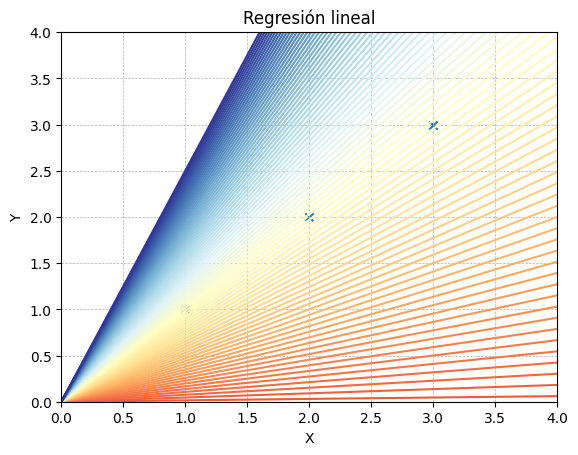

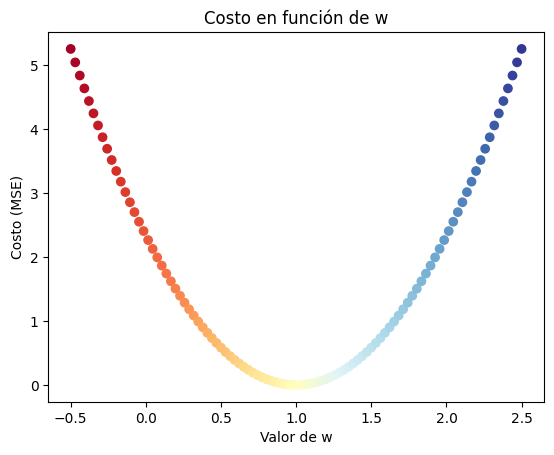

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from regression import linear_regression, mse

data = {'X': [1, 2, 3],
        'Y': [1, 2, 3]}
dataFrame = pd.DataFrame(data)

plt.scatter(dataFrame['X'], dataFrame['Y'], marker='x')

plt.xlim(0, 4)
plt.ylim(0, 4)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal')

w_values = np.linspace(-0.5, 2.5, 100)
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(w_values)))

costs = []
w_list = []

for w, color in zip(w_values, colors):
    estimated_y = linear_regression(dataFrame['X'], w, 0)
    
    cost = mse(dataFrame['Y'], estimated_y)
    
    costs.append(cost)
    w_list.append(w)

    line_x = np.linspace(0, 4, 2)
    line_y = linear_regression(line_x, w, 0)

    plt.plot(line_x, line_y, color=color, label=f'Línea: y = {w} * x + 0')

plt.show()

plt.scatter(w_values, costs, c=colors, marker='o', label='Puntos de costo')
plt.xlabel('Valor de w')
plt.ylabel('Costo (MSE)')
plt.title('Costo en función de w')

plt.show()



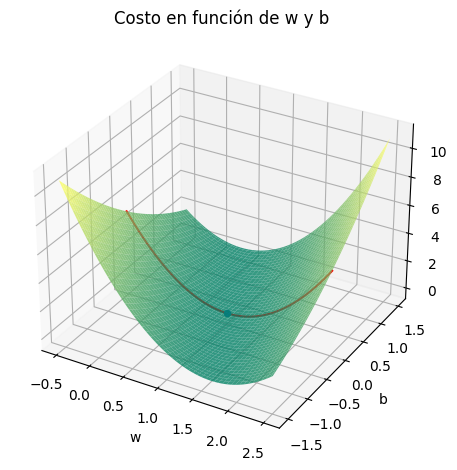

In [2]:
import plotly.graph_objects as go

cost_by_w_and_b_3D = plt.figure(figsize=(12, 8))

cost_by_w_and_b_2D = cost_by_w_and_b_3D.add_subplot(122, projection='3d')

w_values = np.linspace(-0.5, 2.5, 100)
b_values = np.linspace(-1.5, 1.5, 100)

W, B = np.meshgrid(w_values, b_values)
costs_3d = np.array([mse(dataFrame['Y'], linear_regression(dataFrame['X'], w, b)) for w, b in zip(np.ravel(W), np.ravel(B))])
Costs = costs_3d.reshape(W.shape)

norm_costs = (Costs - Costs.min()) / (Costs.max() - Costs.min())

cost_by_w_and_b_2D.plot_surface(W, B, Costs, cmap='summer', alpha=0.8)
cost_by_w_and_b_2D.set_xlabel('w')
cost_by_w_and_b_2D.set_ylabel('b')
cost_by_w_and_b_2D.set_zlabel('Costo')
cost_by_w_and_b_2D.set_title('Costo en función de w y b')
cost_by_w_and_b_2D.scatter(1,0,0)
cost_by_w_and_b_2D.plot(w_values, np.zeros_like(w_values), costs, color='red', label='Línea w_values')

plt.show()

cost_by_w_and_b_3D = go.Figure(data=[go.Surface(z=Costs, x=W, y=B, colorscale='tempo')])
cost_by_w_and_b_3D.add_trace(go.Scatter3d(x=[1], y=[0], z=[0], mode='markers', marker=dict(size=5, color='green'), name='Punto (1, 0, 0)'))
cost_by_w_and_b_3D.add_trace(go.Scatter3d(x=w_values, y=np.zeros_like(w_values), z=costs, mode='lines', name='Línea w_values', line=dict(color='red')))
cost_by_w_and_b_3D.update_layout(scene=dict(xaxis_title='w', yaxis_title='b', zaxis_title='Costo'), title='Costo en función de w y b')
cost_by_w_and_b_3D.show()